In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import os
import random
import wave
import pyaudio
from array import array
import soundfile as sf
import sounddevice as sd
import scipy.io.wavfile as ww
from scipy.io.wavfile import read

In [3]:
PATH_NOISE= os.getcwd()+'/data/noise'

chunk = 2048
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000
length_capture = 20  #20 ms
overlap_frame = 4    #4 ms
start_at = 7         #maybe not used
end_at = 100
DEBUG = False


In [4]:
def getlistwav(path, dir=""):
    if dir == "": dir = path + "/"
    tmp = os.listdir(path)
    result = []
    for i in tmp:
        if str(i).find('wav',0)>0: result.append(dir+i)
    return result

In [131]:
def writefile(filename, data):
    p = pyaudio.PyAudio()
    wf = wave.open(filename, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(data)
    wf.close() 

def addblank(filename, front=0, back=0):
    wv, sr = sf.read(filename)
    wv=np.pad(wv,(front,back),'constant')
    plt.plot(wv)
    return wv

def getlen(filename):
    wv, sr = sf.read(filename)
    print('Length:',len(wv))
    return len(wv)

def pitch(filename,target=None, n_steps=0.0):
    wv,sr = sf.read(filename)
    print(wv)
    wv = wv.T
    wv = librosa.resample(wv,sr,44100,scale=True)
    y_ = librosa.effects.pitch_shift(wv, 44100, n_steps=n_steps)
    y_ = librosa.resample(y_,44100,sr,scale=True)
    print(y_)
    sd.play(y_,samplerate=sr)
    if target!=None: sf.write(target,y_,sr)

def add_random_noise(filename, target):

    #add some blanks front and back
    front = random.randint(0,5000)
    back = random.randint(0,5000)

    wv, sr = sf.read(filename)
    wv=np.pad(wv,(front,back),'constant')


    #random pitch
    ptch = random.uniform(-3,3)

    wv = wv.T
    wv = librosa.resample(wv,sr,44100,scale=True)
    wv = librosa.effects.pitch_shift(wv, 44100, n_steps=ptch)
    #y_ = librosa.resample(y_,44100,sr,scale=True)
    #print(y_)

    #get the noise
    lnoise = getlistwav(PATH_NOISE, dir="",)
    random.shuffle(lnoise)
    wv2, sr2 = sf.read(lnoise[0])
    print(sr2)

    wv2 = wv2.T
    wv2 = librosa.resample(wv2,sr2,44100,scale=True)
    
    rv = random.randint(0,len(wv2)-len(wv))
    wv2 = wv2[rv:rv+len(wv),]
    #wv3 = ((wv * random.uniform(0.9,1.3)) + (wv2 * random.uniform(0,0.4))) / 2
    wv3 = ( (wv * 3) + (wv2 * 2) ) / 6

    wv3 = librosa.resample(wv3,44100,sr,scale=True)

    sd.play(wv3,samplerate=sr)
    if target!=None: sf.write(target,wv3,sr)




In [134]:
ipd.Audio("mi.wav")

In [140]:
for i in range(10):
    add_random_noise('mytest-16000.wav','mi.wav')

16000
16000
16000
16000
16000
16000
16000
16000
16000
16000


Recording
finished recording


NameError: name 'l' is not defined

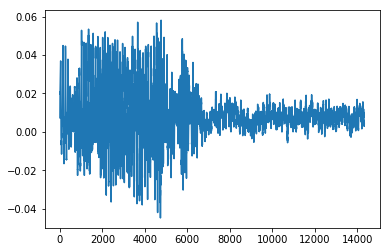

In [48]:
import generator as gn

In [199]:
add_random_noise('mytest-16000.wav','jack.wav')

In [201]:
a = gn.AudioFile('jack.wav')
a.play('jack.wav')

NameError: name 'gn' is not defined

In [11]:
add_random_noise('data/noise/doing_the_dishes.wav')

ValueError: empty range for randrange() (0,-180307, -180307)

In [920]:
ipd.Audio('outa.wav')

In [12]:
#librosa.load("outs.wav")
wv,sr = librosa.load("data/noise/doing_the_dishes.wav", sr=16000, offset=0.0, duration=None)

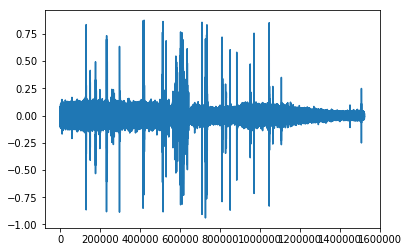

In [13]:
plt.plot(wv)

In [958]:
sr , ff = scipy.io.wavfile.read('mytest.wav')

In [959]:
ff

array([434, 442, 434, ..., 358, 337, 329], dtype=int16)

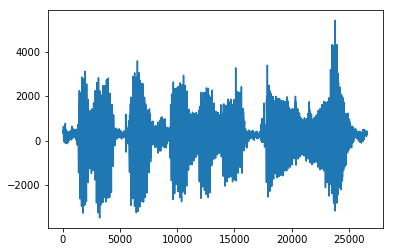

In [960]:
plt.plot(ff.astype('float32'))

AttributeError: module 'librosa' has no attribute 'open'

In [1000]:
'331337'.encode

<function str.encode>

In [1002]:
f = '331337'.encode().hex()


In [1034]:
f

'333331333337'

In [998]:
g = f.encode()

In [1010]:
b'4d9c1880d9'

'34643963313838306439'

In [1047]:
import struct

In [35]:
import aupyom